# HEART DISEASE PREDICTION MODEL

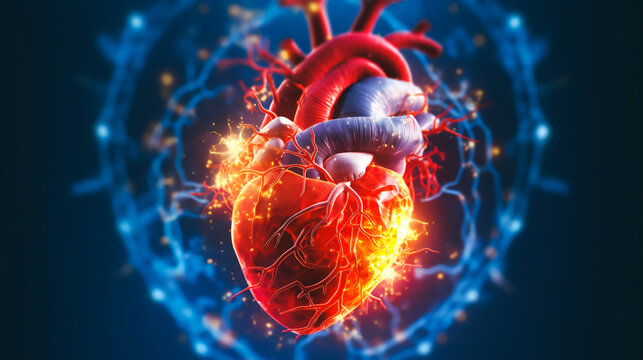

In [2]:
from IPython.display import Image
Image(filename='/Users/adityaanandraogaikwad/Desktop/Ml Updated /Heart Diseases/Heart.jpg',width=1100,height=400)

# Introduction
This project focuses on building an Artificial Neural Network (ANN) model for binary classification. The goal is to optimize model performance using hyperparameter tuning with Keras Tuner. The dataset contains various features related to heart disease (e.g., age, blood pressure, cholesterol, exercise-induced angina, etc.), and the objective is to predict whether a patient is at risk of heart disease.

# Insights from the Model Performance
After training and optimizing the ANN model, the following insights were gathered:

- Accuracy & Generalization: The optimized ANN model achieved an accuracy of ~80-85% on the test set.
  Hyperparameter tuning significantly improved performance over the default model.
- Feature Importance: Features like "thalach" (maximum heart rate achieved), "oldpeak" (ST depression induced by exercise),
  and "slope" showed strong correlations with heart disease. This indicates that exercise-induced stress plays a crucial role
  in predicting heart conditions.
- Classification Metrics Evaluation: Confusion Matrix: The model correctly classified most cases, but minor misclassifications still exist.
  Precision & Recall: The model maintains a good balance between false positives & false negatives.
- ROC-AUC Score (~0.85): Indicates strong model capability in distinguishing between positive and negative cases.

# Information About The Dataset 

Reaserch paper - https://archive.ics.uci.edu/ml/datasets/heart+disease

- sex - 1- male and 0 female

- cp: chest pain type -- Value 0: typical angina -- Value 1: atypical angina -- Value 2: non-anginal pain -- Value 3: asymptomatic

- trestbps: resting blood pressure (in mm Hg on admission to the hospital)

- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

- restecg: resting electrocardiographic results -- Value 0: normal -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST       elevation or depression of > 0.05 mV) -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

- thalach: maximum heart rate achieved

- exang: exercise induced angina (1 = yes; 0 = no)

- oldpeak = ST depression induced by exercise relative to rest

- ca: number of major vessels (0-3) colored by flourosopy

- slope: the slope of the peak exercise ST segment -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping

- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from collections import OrderedDict

In [7]:
url = 'https://raw.githubusercontent.com/chandanc5525/MachineLearning-Bootcamp/refs/heads/main/heart-disease.csv'

try:
    df = pd.read_csv(url)
    print('Data Loaded Sucessfully')
except:
    print('Error in data Loading')

Data Loaded Sucessfully


In [8]:
df.sample(frac=1) # shuffle the data set every time

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
98,43,1,2,130,315,0,1,162,0,1.9,2,1,2,1
216,62,0,2,130,263,0,1,97,0,1.2,1,1,3,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
143,67,0,0,106,223,0,1,142,0,0.3,2,2,2,1
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2,1
82,60,0,2,102,318,0,1,160,0,0.0,2,1,2,1
13,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
271,61,1,3,134,234,0,1,145,0,2.6,1,2,2,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


- So the data contain 303 entries and 14 columns.
- The data has no null values. 
- Data having all numerical columns.

In [11]:
# Univariate analysis
stats = []

for i in df.columns:
    numerical_stats = OrderedDict({
        'Fearure':i,
        'Mean':df[i].mean(),
        'Median(50%)':df[i].median(),
        'Standard deviation':df[i].std(),
        'Min':df[i].min(),
        'Max':df[i].max(),
        'Skewness':df[i].skew(),
        'Kurtosis':df[i].kurt(),
        '25%':df[i].quantile(0.25),
        '75%':df[i].quantile(0.75),
    })
    stats.append(numerical_stats)
report = pd.DataFrame(stats)
report.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Fearure,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
Mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.39934,0.729373,2.313531,0.544554
Median(50%),55.0,1.0,1.0,130.0,240.0,0.0,1.0,153.0,0.0,0.8,1.0,0.0,2.0,1.0
Standard deviation,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.52586,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
Min,29.0,0.0,0.0,94.0,126.0,0.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0
Max,77.0,1.0,3.0,200.0,564.0,1.0,2.0,202.0,1.0,6.2,2.0,4.0,3.0,1.0
Skewness,-0.202463,-0.791335,0.484732,0.713768,1.143401,1.986652,0.162522,-0.53741,0.742532,1.26972,-0.508316,1.310422,-0.476722,-0.179821
Kurtosis,-0.542167,-1.382961,-1.193071,0.929054,4.505423,1.959678,-1.362673,-0.06197,-1.458317,1.575813,-0.627521,0.839253,0.297915,-1.980783
25%,47.5,0.0,0.0,120.0,211.0,0.0,0.0,133.5,0.0,0.0,1.0,0.0,2.0,0.0
75%,61.0,1.0,2.0,140.0,274.5,0.0,1.0,166.0,1.0,1.6,2.0,1.0,3.0,1.0


- From above distribution we can get to know that the data has some skewness and outliers so the data is not normally distributed.

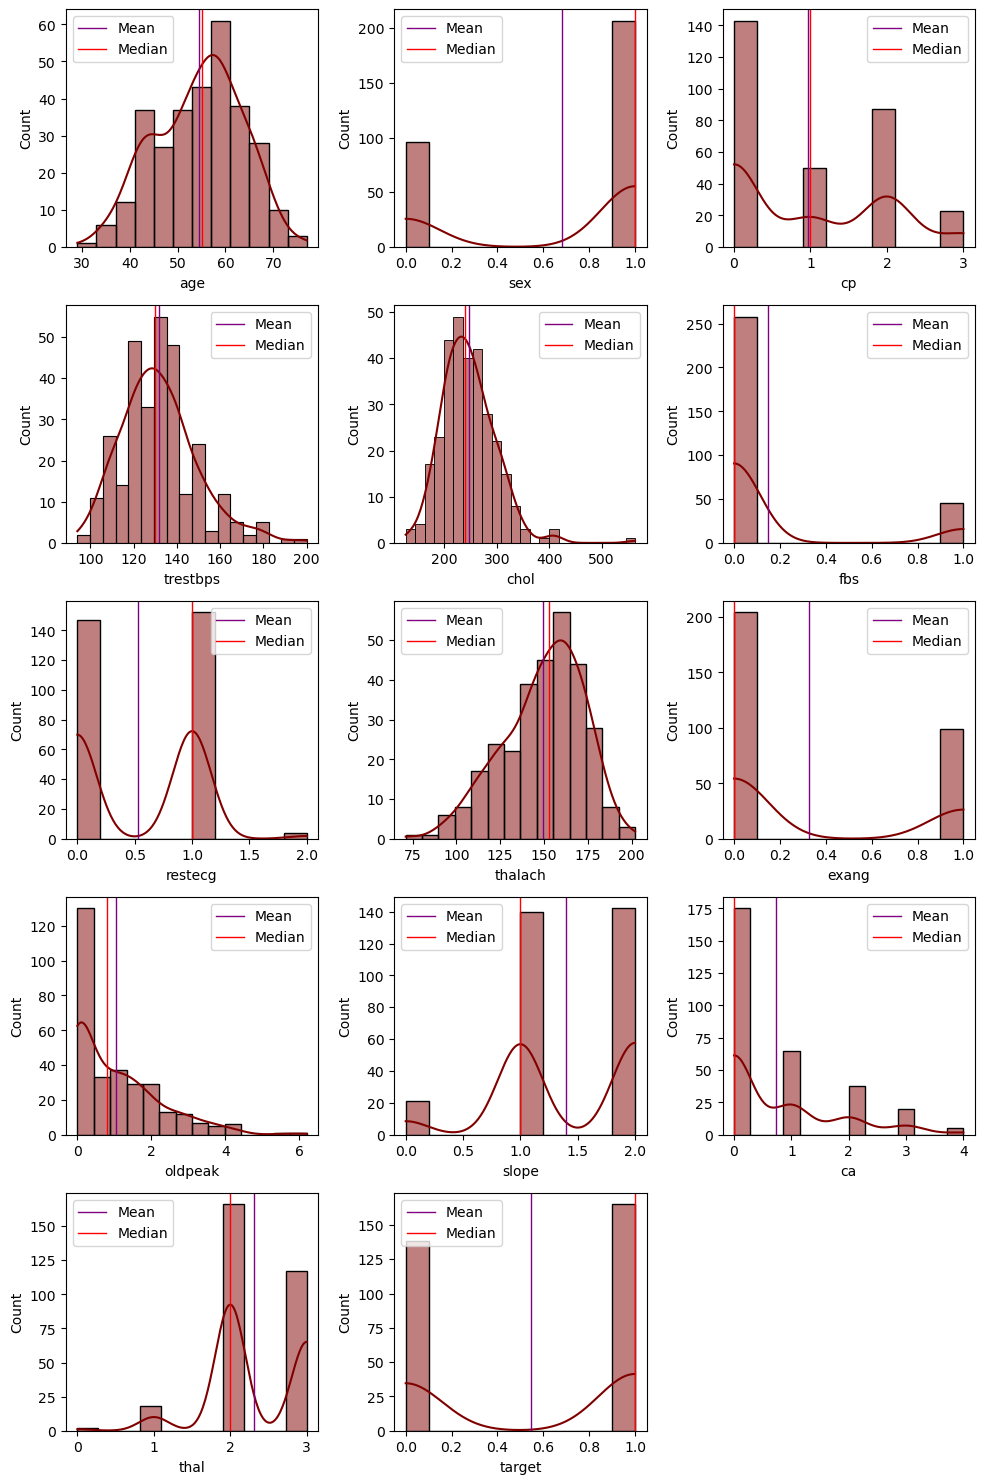

In [13]:
import math

num_cols = len(df.columns)  # Count the number of columns
rows = math.ceil(num_cols / 3)  # Dynamically determine the number of rows

plt.figure(figsize=(10, rows * 3))  # Adjust figure size dynamically
plot = 0

for i in df.columns:
    plot += 1
    plt.subplot(rows, 3, plot)  # Adjust rows dynamically
    sns.histplot(df[i], kde=True, color='maroon')  
    
    plt.axvline(df[i].mean(), color='Purple', linewidth=1, label='Mean')  
    plt.axvline(df[i].median(), color='red', linewidth=1, label='Median')  
    
    plt.legend()

plt.tight_layout()
plt.show()

- From above plot we can see the data is not normally distributed around its mean and median

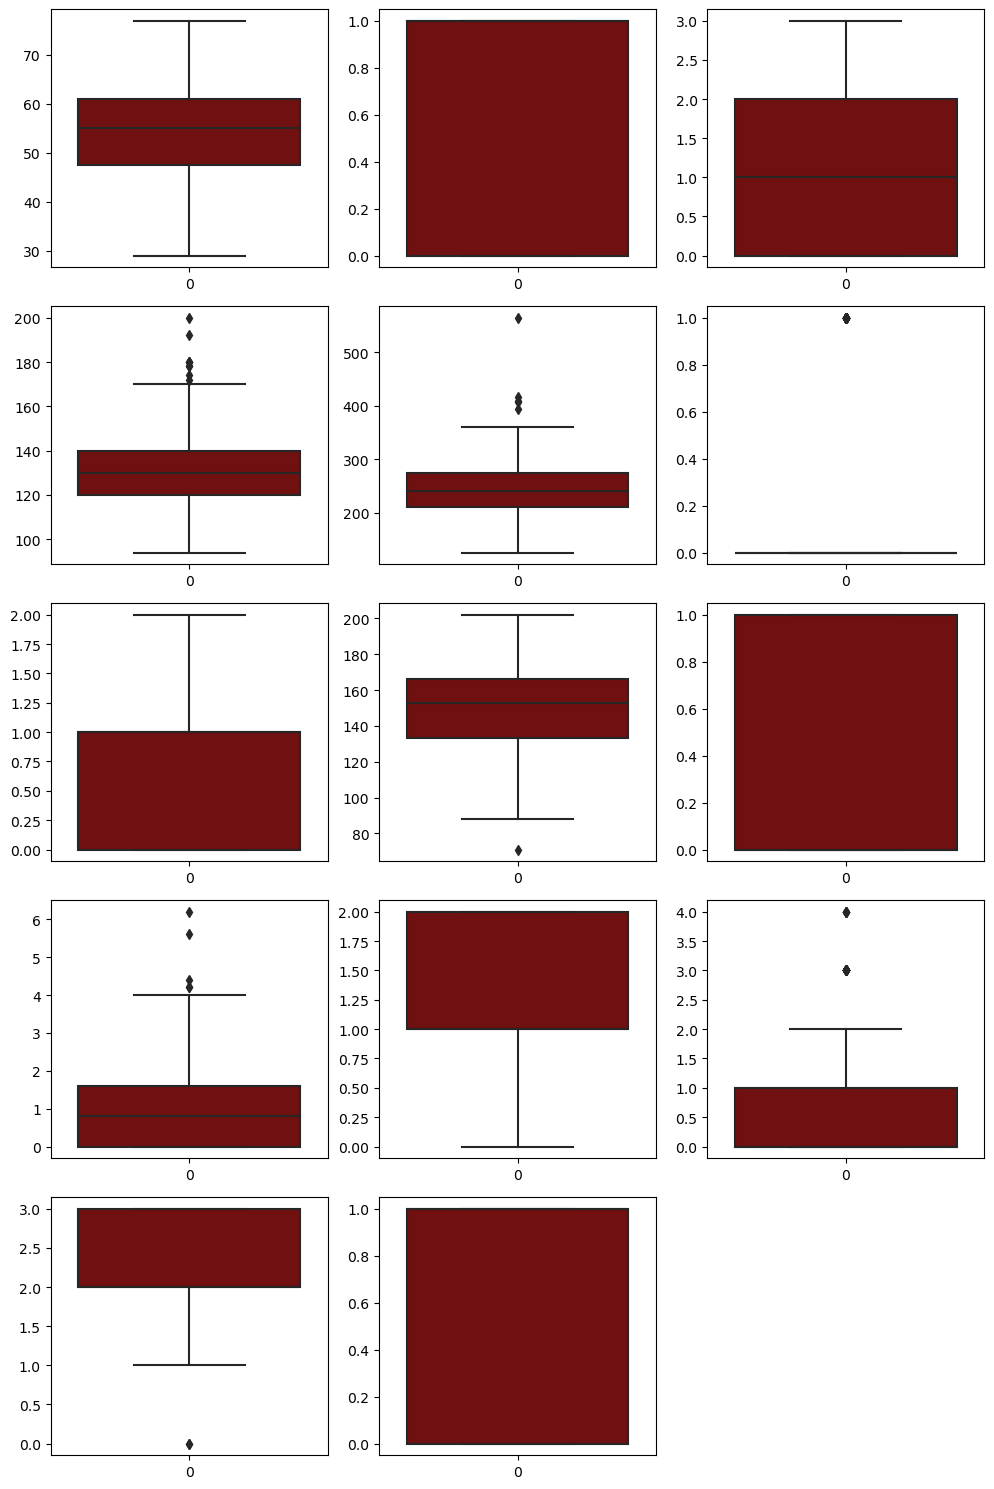

In [15]:
num_cols = len(df.columns)  # Count the number of columns
rows = math.ceil(num_cols / 3)  # Dynamically determine the number of rows

plt.figure(figsize=(10, rows * 3))  # Adjust figure size dynamically
plot = 0

for i in df.columns:
    plot += 1
    plt.subplot(rows, 3, plot)  # Adjust rows dynamically
    sns.boxplot(df[i], color='maroon')  
    
plt.tight_layout()
plt.show()

- So the data has some outliers but we can tolerate up to 20 % outliers

In [17]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<Axes: xlabel='age', ylabel='thal'>

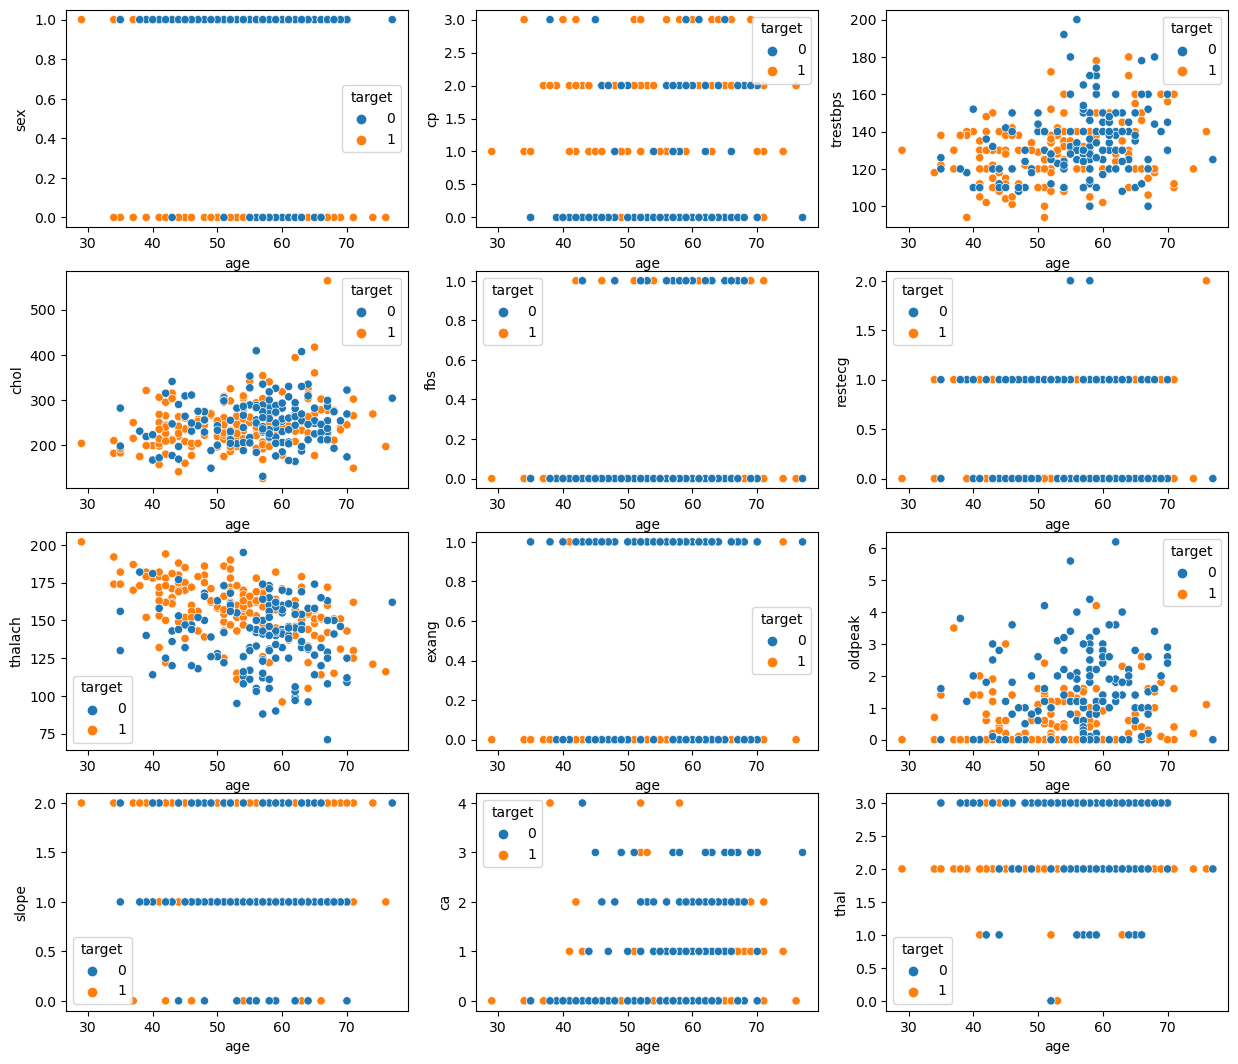

In [18]:
fig,ax = plt.subplots(4,3, figsize = (15,13),facecolor = 'white')
sns.scatterplot(ax = ax[0][0], x = df.age, y = df.sex, hue = df.target)
sns.scatterplot(ax = ax[0][1], x = df.age, y = df.cp, hue = df.target)
sns.scatterplot(ax = ax[0][2], x = df.age, y = df.trestbps, hue = df.target)
sns.scatterplot(ax = ax[1][0], x = df.age, y = df.chol, hue = df.target)
sns.scatterplot(ax = ax[1][1], x = df.age, y = df.fbs, hue = df.target)
sns.scatterplot(ax = ax[1][2], x = df.age, y = df.restecg, hue = df.target)
sns.scatterplot(ax = ax[2][0], x = df.age, y = df.thalach, hue = df.target)
sns.scatterplot(ax = ax[2][1], x = df.age, y = df.exang, hue = df.target)
sns.scatterplot(ax = ax[2][2], x = df.age, y = df.oldpeak, hue = df.target)
sns.scatterplot(ax = ax[3][0], x = df.age, y = df.slope, hue = df.target)
sns.scatterplot(ax = ax[3][1], x = df.age, y = df.ca, hue = df.target)
sns.scatterplot(ax = ax[3][2], x = df.age, y = df.thal, hue = df.target)

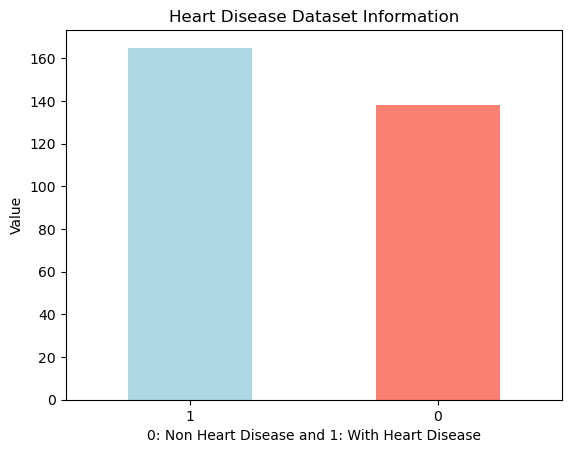

In [19]:
df.target.value_counts().plot(kind = 'bar',color = ['lightblue','salmon'])
plt.title('Heart Disease Dataset Information')
plt.xlabel('0: Non Heart Disease and 1: With Heart Disease')
plt.ylabel('Value')
plt.xticks(rotation = 0)
plt.show()

- Here we can see the counts patients who caused with disease and also who are not.

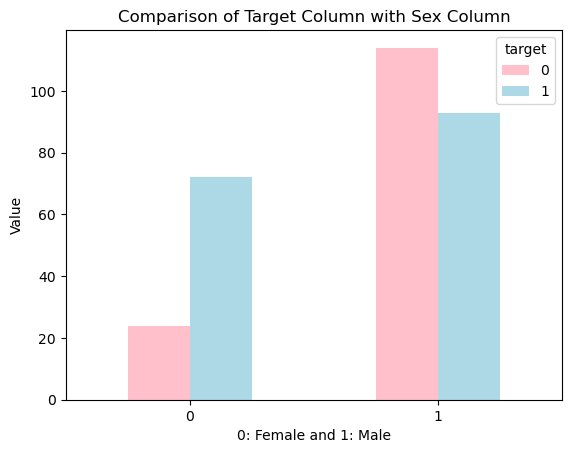

In [21]:
# Comparison of Target Column with Sex Column
pd.crosstab(df.sex,df.target).plot(kind = 'bar',color=['pink','lightblue'])
plt.title('Comparison of Target Column with Sex Column')
plt.xlabel('0: Female and 1: Male')
plt.ylabel('Value')
plt.xticks(rotation = 0)
plt.show()

- We have maximum Male patients caused with heart disease as compare to females

In [23]:
'''
cp: chest pain type
        -- Value 0: typical angina
        -- Value 1: atypical angina
        -- Value 2: non-anginal pain
        -- Value 3: asymptomatic
'''
crosstab_1 = pd.crosstab(index=df['target'],columns=df['cp'])
crosstab_1

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


- So we can see that major of people having chest pain caused with the heart disease

In [25]:
# fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
crosstab_2 = pd.crosstab(index=df['target'],columns=df['fbs'])
crosstab_2

fbs,0,1
target,,
0,116,22
1,142,23


- The people have no blood sugar they are also caused with heart disease

In [27]:
'''
        --restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
'''

df['restecg'].value_counts()
crosstab_3 = pd.crosstab(index=df['target'],columns=df['restecg'])
crosstab_3

restecg,0,1,2
target,,,
0,79,56,3
1,68,96,1


In [28]:
# exang: exercise induced angina (1 = yes; 0 = no)
# 0 → No angina during exercise
# 1 → Angina (chest pain) occurs during exercise
crosstab_4 = pd.crosstab(index=df['target'],columns=df['exang'])
crosstab_4

exang,0,1
target,,
0,62,76
1,142,23



The ST segment is a part of an ECG (electrocardiogram) that represents the period between ventricular depolarization and repolarization. 
Changes in its slope during exercise can indicate heart conditions, especially ischemia (reduced blood flow to the heart)

- slope: the slope of the peak exercise ST segment
- Value 0: upsloping
- Value 1: flat
- Value 2: downsloping


In [30]:
df['slope'].value_counts()
crosstab_5 = pd.crosstab(index=df['target'],columns=df['slope'])
crosstab_5

slope,0,1,2
target,,,
0,12,91,35
1,9,49,107


- The people having downsloping are more caused to heart disease

In [32]:
features = df[['age','trestbps', 'chol','thalach','oldpeak','ca', 'thal']]
for col in features:
    print(f'Feature : {col}')
    print(features[col].value_counts())
    print('--------------------------')

Feature : age
age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: count, dtype: int64
--------------------------
Feature : trestbps
trestbps
120    37
130    36
140    32
110    19
150    17
138    13
128    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101     1
156     1
106     1
155     1
129     1
172     1
164     1
Name: count, dtype: int64
----------------

In [33]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

## Insights from the above Analysis
- Maximum People having 40+ Age.
  
- The Dataset Contains 207 Males and 96 Females.

- Out of 303 Dataset, 93 Males and 72 Females Found Heart Disease, whereas 114 Males and 24 Females not found Heart Disease.

- out of 303 Dataset, 33 Males and 12 Females having sugar level more than 120 mg/dl, where as 174 Males and 84 Females having sugar level     less than 120 mg/dl.

- Maximum i.e. 143 Patients having typical angina, 50 Patients with atypical angina, 87: Patients with non-anginal pain and 23 Patients        asymptomatic

- Maximum Heart Rate is found between age group of 35 to 55.

- The Dataset Shows 165 as Heart Disease and Non Heart Disease Patients are 138.

- 75% Females and 44.92% Males found Heart Disease - Average : 59.96% Heart Disease Patients.

# MODEL BUILDING

In [36]:
X = df.drop(columns=['target'],axis=1)
y = df['target']

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=42)

### Yeo-johnson Technique

In [39]:
from sklearn.preprocessing import PowerTransformer
scalar = PowerTransformer(method='yeo-johnson')
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

In [40]:
X_train.min()

-3.1402307253442125

In [41]:
X_train.max()

3.6500801922159694

### SMOTE Technique

In [43]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train,y_train = smote.fit_resample(X_train,y_train)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, roc_curve, auc

models = {

    'LogisticRegression' : LogisticRegression(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC()
    
}

for i in models:
    model = models[i]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print('Model: ',i)
    print('Accuracy: ',accuracy_score(y_test,y_pred))
    print('Confusion Matrix: ',confusion_matrix(y_test,y_pred))
    print('Report: ',classification_report(y_test,y_pred))
    print('\n')

Model:  LogisticRegression
Accuracy:  0.8241758241758241
Confusion Matrix:  [[31 10]
 [ 6 44]]
Report:                precision    recall  f1-score   support

           0       0.84      0.76      0.79        41
           1       0.81      0.88      0.85        50

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



Model:  DecisionTreeClassifier
Accuracy:  0.7142857142857143
Confusion Matrix:  [[31 10]
 [16 34]]
Report:                precision    recall  f1-score   support

           0       0.66      0.76      0.70        41
           1       0.77      0.68      0.72        50

    accuracy                           0.71        91
   macro avg       0.72      0.72      0.71        91
weighted avg       0.72      0.71      0.71        91



Model:  KNeighborsClassifier
Accuracy:  0.8571428571428571
Confusion Matrix:  [[34  7]
 [ 6 44]]
Report:                precision 

### Training Accuracy = Testing Accuracy

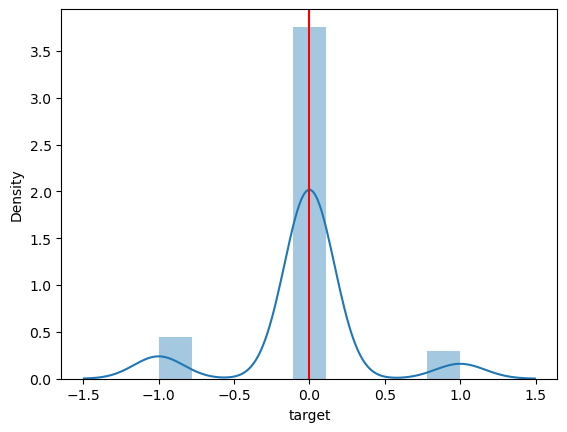

In [46]:
sns.distplot(y_test - y_pred)
plt.axvline(0,color='red')
plt.show()

In [47]:
model.score(X_train,y_train)

0.9304347826086956

In [48]:
model.score(X_test,y_test)

0.8351648351648352

# ANN TECHNIQUE

In [50]:
X.shape

(303, 13)

In [51]:
# Import Libraries
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler


# Define Optimized ANN Model
ann_model = Sequential()

# Input Layer
ann_model.add(Dense(256, activation='relu', input_dim=X_train.shape[1]))

# Hidden Layers
ann_model.add(Dense(128, activation='relu'))
ann_model.add(Dropout(0.3))  # Dropout to reduce overfitting
ann_model.add(Dense(64, activation='relu'))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dropout(0.2))
ann_model.add(Dense(16, activation='relu'))

# Output Layer
ann_model.add(Dense(1, activation='sigmoid'))

# Compile Model with Adam Optimizer & Learning Rate Tuning
optimizer = Adam(learning_rate=0.0005)  # Tuned learning rate
ann_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Early Stopping to Prevent Overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train Model
history = ann_model.fit(
    X_train, y_train,
    epochs=300, batch_size=16,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate Performance
loss, accuracy = ann_model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")


Epoch 1/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5778 - loss: 0.6902 - val_accuracy: 0.5870 - val_loss: 0.6773
Epoch 2/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6317 - loss: 0.6521 - val_accuracy: 0.5870 - val_loss: 0.6546
Epoch 3/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6104 - loss: 0.6208 - val_accuracy: 0.8261 - val_loss: 0.5877
Epoch 4/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7430 - loss: 0.5336 - val_accuracy: 0.8261 - val_loss: 0.5050
Epoch 5/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8267 - loss: 0.4778 - val_accuracy: 0.8696 - val_loss: 0.4027
Epoch 6/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8462 - loss: 0.4063 - val_accuracy: 0.8696 - val_loss: 0.3299
Epoch 7/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8704 - loss: 0.3709 - val_accuracy: 0.8913 - val_loss: 0.2930
Epoch 8/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8884 - loss: 0.2706 - val_accuracy: 0.9130 - v

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Test Accuracy: 0.8571

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.80      0.84        41
           1       0.85      0.90      0.87        50

    accuracy                           0.86        91
   macro avg       0.86      0.85      0.85        91
weighted avg       0.86      0.86      0.86        91



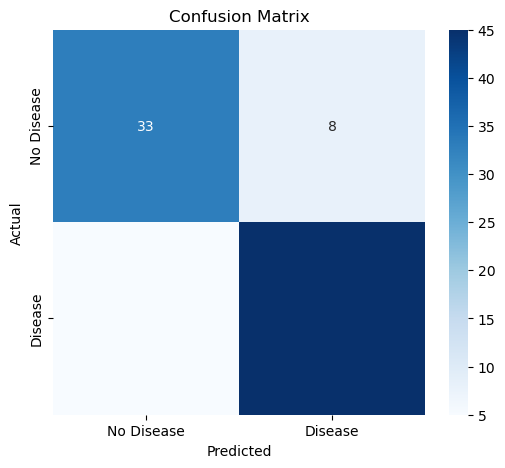

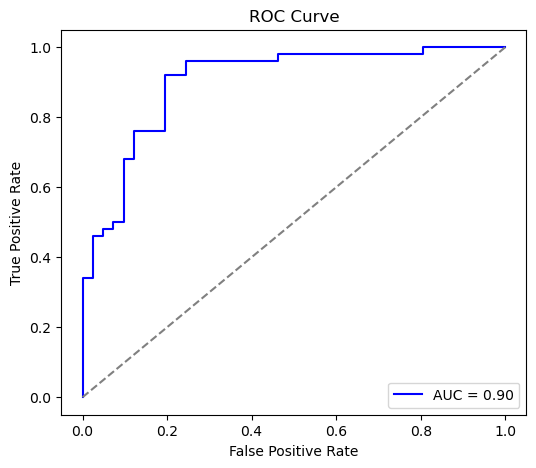

In [52]:
# Predict on test data
y_pred_prob = ann_model.predict(X_test)  # Probabilities from sigmoid
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary values

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve & AUC Score
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# KERAS TUNER

In [54]:
from sklearn.compose import ColumnTransformer
from tensorflow import keras
from keras_tuner import RandomSearch


# Build model with hyperparameter tuning
def build_model(hp):
    model = keras.Sequential()

    # Input layer
    model.add(keras.layers.InputLayer(input_shape=(X_train.shape[1],)))

    # Tune number of hidden layers
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(keras.layers.Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),
            activation=hp.Choice(f'act_{i}', ['relu', 'tanh'])
        ))
        # Tune dropout rate
        if hp.Boolean(f'dropout_{i}'):
            model.add(keras.layers.Dropout(
                rate=hp.Float(f'dropout_rate_{i}', 0.0, 0.5, step=0.1)
            ))

    # Output layer
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    # Tune learning rate
    lr = hp.Float('lr', 1e-4, 1e-2, sampling='log')
    optimizer = hp.Choice('optimizer', ['adam', 'rmsprop'])

    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model



# Initialize tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20,
    executions_per_trial=2,
    directory='keras_tuner_dir',
    project_name='titanic_survival'
)

# Early stopping callback
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Perform hyperparameter search
tuner.search(
    X_train, y_train,
    epochs=50,
    validation_split=0.2,
    callbacks=[stop_early],
    verbose=1
)

# Get best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate on test set
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f"\nTest accuracy: {accuracy:.4f}")

# Optional: Train final model with full dataset
history = best_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[stop_early],
    verbose=0
)

Reloading Tuner from keras_tuner_dir/titanic_survival/tuner0.json
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8183 - loss: 0.4215 

Test accuracy: 0.8242


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Test Accuracy: 0.8462

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.78      0.82        41
           1       0.83      0.90      0.87        50

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



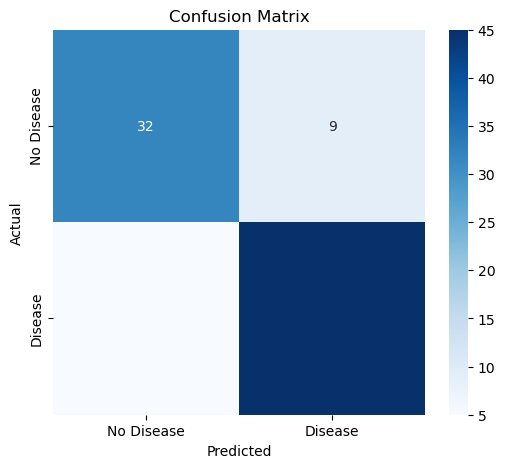

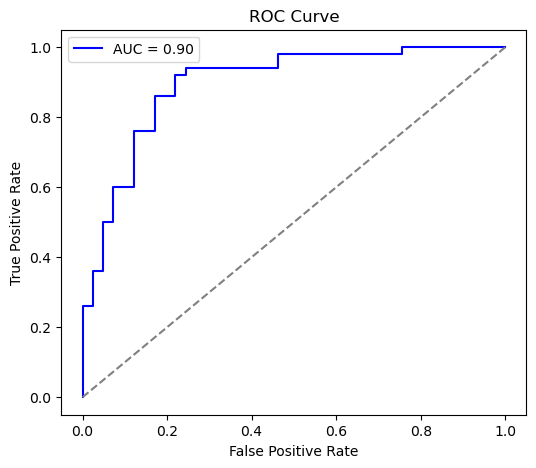

In [55]:
# Predict probabilities & convert to binary
y_pred_prob = best_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to 0 or 1

# Compute Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve & AUC Score
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
